<a href="https://colab.research.google.com/github/soliana-k/CODSOFT/blob/main/task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kalkidankassahun","key":"e2d05351cf630087f898bec5e8092224"}'}

In [2]:
!mkdir -p ~./kaggle
!mv kaggle.json ~./kaggle
!chmod 600 ~./kaggle/kaggle.json

In [3]:
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 75.7MB/s]


In [4]:
!unzip sms-spam-collection-dataset.zip -d /content/

Archive:  sms-spam-collection-dataset.zip
  inflating: /content/spam.csv       


In [5]:
!pip download nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 792.7/792.7 kB 27.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.7 MB/s eta 0:00:00
Saved ./nltk-3.9.1-py3-none-any.whl
Saved ./regex-2024.11.6-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl
Saved ./click-8.1.8-py3-none-any.whl
Saved ./joblib-1.4.2-py3-none-any.whl
Saved ./tqdm-4.67.1-py3-none-any.whl
Successfully downloaded nltk regex click joblib tqdm


In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [7]:
import pandas as pd
import numpy as np

In [8]:
data=pd.read_csv('/content/spam.csv', encoding='latin-1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [9]:
data.isna().sum()
#checking for missing data. and there are missing datas in unnamed:2, unnamed:3 and unnamed:4 columns

,0
v1,0
v2,0
Unnamed: 2,5522
Unnamed: 3,5560
Unnamed: 4,5566


In [10]:
#dropping the unnmaed columns coz they would be no use to us
data=data.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [11]:
#renaming the columns so it would be easy to work with
data=data.rename(columns={'v1':'Label', 'v2':'Feature'})
data

,Label,Feature
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# doinng some looking on the data
data.groupby('Label').describe()

Feature                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [13]:
#copying the features column for preproccesing
word_process=data['Feature'].copy()
word_process

,Feature
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [14]:
# doing some text processing. gonna have to use tfidfvectorizer and NLTK library
#used nltk here so it would remove stop words and punctutations
import string
from nltk.corpus import stopwords
def process_words(word):
  word=word.translate(str.maketrans('', '', string.punctuation))
  word = [w for w in word.split() if w.lower() not in stopwords.words('english')]
  return " ".join(word)

In [15]:
#applying the function on our features
word_process=word_process.apply(process_words)

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf=TfidfVectorizer()
features=tf.fit_transform(word_process)

In [17]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Label'] = le.fit_transform(data['Label'])

In [18]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y=train_test_split(features, data['Label'], test_size=0.2, random_state=0, stratify=data['Label'])

In [19]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB(alpha=0.2)
nb_model.fit(train_x, train_y)

MultinomialNB(alpha=0.2)

In [20]:
nb_model.score(val_x, val_y)

0.9748878923766816

In [21]:
pred=nb_model.predict(val_x)

In [22]:
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
print('Classification Report ', classification_report(pred, val_y))
print('Accuracy Score ', accuracy_score(pred, val_y))
print('ROC AUC score ', roc_auc_score(pred, val_y))

Classification Report                precision    recall  f1-score   support

           0       0.99      0.98      0.99       976
           1       0.87      0.94      0.90       139

    accuracy                           0.97      1115
   macro avg       0.93      0.96      0.94      1115
weighted avg       0.98      0.97      0.98      1115

Accuracy Score  0.9748878923766816
ROC AUC score  0.9578922927231985


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_ranking.py:1188: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


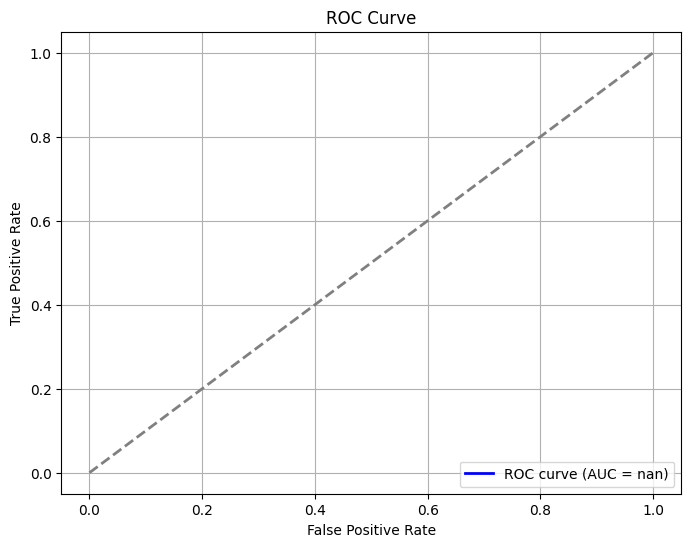

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_prob = nb_model.predict_proba(val_x)[:, 1]

fpr, tpr, thresholds = roc_curve(val_y, y_prob, pos_label='spam')
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
